![title](Picture1.png)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#General-Properties" data-toc-modified-id="General-Properties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General Properties</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#Analysis-and-conclusion" data-toc-modified-id="Analysis-and-conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis and conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Movie-production-Trendy-during-1961-2016" data-toc-modified-id="Movie-production-Trendy-during-1961-2016-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Movie production Trendy during 1961-2016</a></span></li><li><span><a href="#Production-country" data-toc-modified-id="Production-country-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Production country</a></span></li><li><span><a href="#U.S.A-movie-trend-during-1961-to-2016" data-toc-modified-id="U.S.A-movie-trend-during-1961-to-2016-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>U.S.A movie trend during 1961 to 2016</a></span><ul class="toc-item"><li><span><a href="#Correlation-among-budget,-revenue,-rating,-popularity-and-released-year." data-toc-modified-id="Correlation-among-budget,-revenue,-rating,-popularity-and-released-year.-3.0.3.1"><span class="toc-item-num">3.0.3.1&nbsp;&nbsp;</span>Correlation among budget, revenue, rating, popularity and released year.</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-3.0.3.2"><span class="toc-item-num">3.0.3.2&nbsp;&nbsp;</span>Revenue</a></span></li><li><span><a href="#Rating" data-toc-modified-id="Rating-3.0.3.3"><span class="toc-item-num">3.0.3.3&nbsp;&nbsp;</span>Rating</a></span></li></ul></li></ul></li></ul></li></ul></div>

#  Introduction

To better understanding the development of industry, a market trend analysis for films is crucial. Revenue from market and word of mouth from audience are two major indicators of the succeed of a movie. From the point of these views, the dataset was fully explored to present summaries and prediction in film industry.

In this project, TMDb 5000 Movie dataset from Kaggle(https://www.kaggle.com/tmdb/tmdb-movie-metadata) was selected.This dataset concludes information like cast, crew, budget, and revenues of several thousand films,which a great place to start digging in to questions.

Data was wrangled,cleaned and organized in Chapter two. Analysis and conclusion focsing on U.S.A film industry were given in Chapter three.

*Acknowledgement: some functions are reference to or entirely taken from Fabien Daniel's and Sohier Dane's kernels.*

# Data Wrangling

## General Properties

1. Two files are loaded and explored.

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_movies=pd.read_csv('tmdb_5000_movies.csv')
df_credits=pd.read_csv('tmdb_5000_credits.csv')

2. There are several of the new columns contain json and data in these columns() was converted to python Object datatype.

*The code below is refered to (https://www.kaggle.com/sohier/film-recommendation-engine-converted-to-use-tmdb):*

In [3]:
json_columns_movies=['genres','keywords','production_countries','production_companies','spoken_languages']
for col in json_columns_movies:
    df_movies[col]=df_movies[col].apply(json.loads)
    
json_columns_credits=['cast','crew']
for col in json_columns_credits:
    df_credits[col]=df_credits[col].apply(json.loads) 

3. Data type of release_date is converted to timedate type.

In [4]:
df_movies['release_date']= pd.to_datetime(df_movies['release_date']).apply(lambda x:x.date())

4. These two datasets are combine together by merge function and the key is 'title'.

In [5]:
df=pd.merge(df_movies,df_credits,how='outer',on='title')

## Data Cleaning

*Several functions are defined to organized the dataset.The code below is reference to (https://www.kaggle.com/sohier/film-recommendation-engine-converted-to-use-tmdb):*

1. 'safe_access' function returns a missing value rather than an error upon indexing/key failure.

2. 'Genres' and 'key_words' columns are arranged and values in json are separated by pipe (|) characters by 'pipe_flatten_names' function.

3. Years from 'release_date' column are extracted and saved as 'release_year' in numeric type.

4. I assumpted the first country,company and language in 'production_countries','production_companies' and 'spoken_languages' columns as the primary country,company and language.
*This classification criterion is still further to be surveyed.*

5.'overview','homepage'and 'id' columns are deleted. New dataset is exported.

In [6]:
def safe_access(container,index_values):
    result=container
    try:
        for idx in index_values:
            result=result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [7]:
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

In [8]:
df['release_year']=pd.to_datetime(df['release_date']).apply(lambda x: x.year)

df['country']=df['production_countries'].apply(lambda x:safe_access(x,[0,'name']))
df['language']=df['spoken_languages'].apply(lambda x:safe_access(x,[0,'name']))
df['company']=df['production_companies'].apply(lambda x:safe_access(x,[0,'name']))

json_columns=['genres','keywords']

for col in json_columns:
    df[col]=df[col].apply(pipe_flatten_names)

In [9]:
df.drop(columns=['overview','homepage','id'],inplace=True)

In [10]:
df.to_csv('combined.csv',index=False)

# Analysis and conclusion

###  Movie production Trendy during 1961-2016

The yearly number of movies during 1961-2016 was plotted to visualized the trend of film production.

*The number of movie in 2017 is dramatically  decreased to one, thus this row was deleted.*

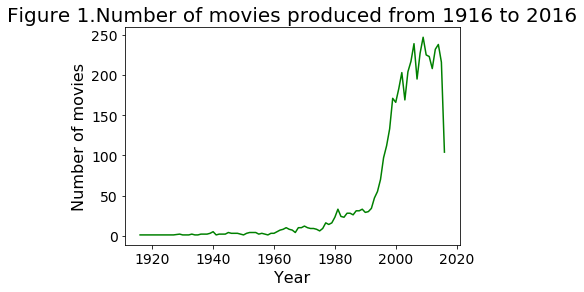

In [11]:
df_date=df['release_year'].value_counts()
df_date=df_date.sort_index().iloc[:-1]

x=df_date.index
y=df_date.values

plt.figure(figsize=(6,4))
plt.title('Figure 1.Number of movies produced from 1916 to 2016',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of movies',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(x,y,color='green')
plt.show()

In this dataset, global movie production showed explosive growth approximately in 1990 and maintained this high-level productivity in next 20 years(**Fig.2**).But it slumped in 2016 and the reason for that is unclear. 

### Production country

To explore the film industry in global market,the movie production of each country was grouped and analysed.

*Movies which production country labeled 'Hong Kong' are classified as 'China' and the number of films are added.

*Countries having movies less than 50 are classified as Others.

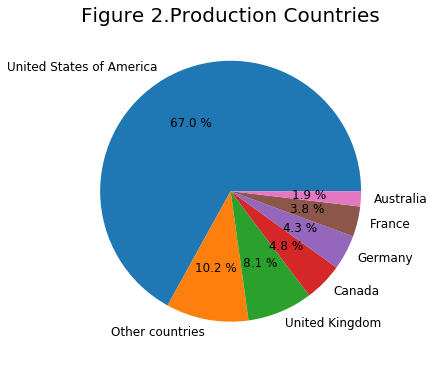

In [12]:
df_country=df['country'].value_counts()
df_country['Other countries']=sum(df_country[df_country.values<=50])
df_country=df_country[df_country.values>50].sort_values(ascending=False)

y=df_country.values
yy=y/sum(y)

plt.figure(figsize=(6,6))
plt.title('Figure 2.Production Countries',fontsize=20)
plt.pie(y,labels=df_country.index,autopct='%.1f %%',textprops = {'fontsize':12, 'color':'k'})
plt.show()

Figure 2 shows that in this dataset,  movies produced by United State of American, United Kingdom and Canada are occupied more than 80%, which indicates the dataset is appropriated for analysis European and American film industry.Thus, movies from U.S.A are collected and export into a new spreadsheet.

In [13]:
df.to_csv('movie_usa.csv',index=False)

### U.S.A movie trend during 1961 to 2016

Revenue from market and word of mouth from audience are two major indicators of the succeed of a movie. In this part, the dataset was fully explored to present summaries and prediction in film industry in the point view of both market and art.

#### Correlation among budget, revenue, rating, popularity and released year.

*'vote_average' was renamed as rating identified as audience measurement.

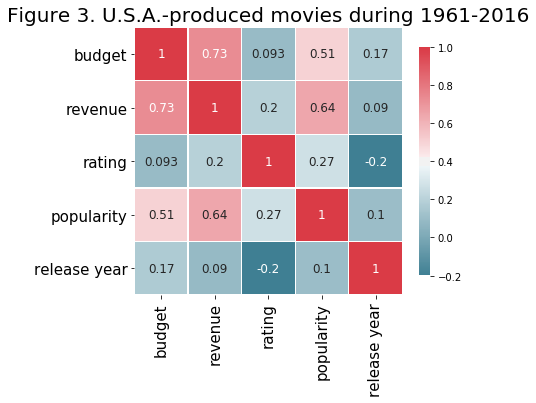

In [14]:
df=pd.read_csv('movie_usa.csv')
df_heatmap=df.loc[:,['budget','revenue','vote_average','popularity','release_year']]
df_heatmap.rename(columns={'vote_average':'rating','release_year':'release year'},inplace=True)

corr = df_heatmap.corr()

f, ax = plt.subplots(figsize=(6, 6)) 
plt.title("Figure 3. U.S.A.-produced movies during 1961-2016", fontsize=20)
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
plt.tick_params(labelsize=15)
sns.heatmap(corr, cmap=cmap, vmax=1.0, square=True, xticklabels=1, yticklabels=1, 
            linewidths=.3, cbar_kws={"shrink": .7}, ax=ax,annot=True, annot_kws={"size": 12}) 
plt.show()

Figure 3 clearly exhibited the correlation coefficient between two variables of numeric type columns of budget, revenue, rating, popularity and release year.Revenue is highly positive related with budget and popularity with correlation coefficient 0.73 and 0.64,respectively. Does this indicate films costing more to produce are more popular in market? Whereas rating has weakly correlation with all the variables. Interestingly, the correlation coefficient between rating and release year showed a negative relationship. Does this mean audience like old films better?

In the next parts, top 10 movies in revenue and rating were listed and some of features of them were discussed.

#### Revenue

Revenue is the amount of money that the company actually receives after movie was released. It is crucial in evaluation criteria to the succeed in film industry.

###### TOP 10 movies in revenue.

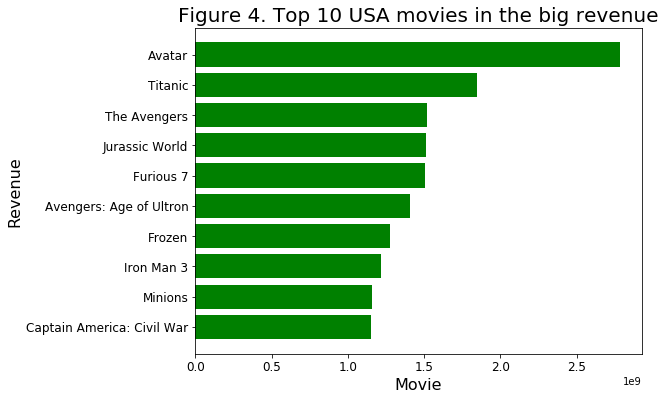

In [15]:
df_revenue=df.set_index('revenue',drop=False)
df_revenue=df_revenue.sort_index().iloc[-10:]
plt.figure(figsize=(8,6))
plt.title('Figure 4. Top 10 USA movies in the big revenue',fontsize=20)
plt.xlabel('Movie',fontsize=16)
plt.ylabel('Revenue',fontsize=16)
plt.tick_params(labelsize=12)
plt.barh(df_revenue.title,df_revenue.revenue,color='green')
plt.show()

In the top 10 movies( **Fig. 4** ), most of them have series films,which can be recognized as one of the reason of high revenuse. For example, Marvel studio takes four places in the rank: The Avenger,Avengers: Age of Ultron, Iron Man 3 and Captain America:Civil War, in the top 10.From the first Avengers series movie,Iron Man (2008), published in 2008, Marvel studio produced at least one flim every year and almost every one was critical and uniformly financial successes,leading to accumulation of popularity as well as quickly open the market. It is prdicted that the style of makng series of films will be in favor of market.

Based on the description of genres on TMDB website, they added 2 or 3 most relevant film genres that best describe the movie.Thus, every genres listed in the dataset would be counted to explore the genres content.The number of generes less than 20 were aggregated and identified as 'Others'.

*The code below is reference to (https://www.kaggle.com/sohier/film-recommendation-engine-converted-to-use-tmdb)*

In [16]:
df_revenue=df.set_index('revenue',drop=False)
df_revenue=df_revenue.sort_index().iloc[-500:]

In [17]:
# first listed all the generes which are in the dataset:
set_genres = set()
for liste_genres in df['genres'].str.split('|').values:
    if isinstance(liste_genres, float): continue         
    set_genres = set_genres.union(liste_genres)

#then define a function that counts the number of times each of them appear:


def count_word(df, ref_col, liste):
    genres_count = dict()
    for s in liste: genres_count[s] = 0
    for liste_genres in df[ref_col].str.split('|'):
        if type(liste_genres) == float and pd.isnull(liste_genres): continue 
        for s in [s for s in liste_genres if s in liste]: 
        
            if pd.notnull(s): genres_count[s] += 1

  #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in genres_count.items(): 
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, genres_count

In [18]:
keyword_occurences, dum = count_word(df_revenue, 'genres', set_genres)
x, y = zip(*keyword_occurences) # unpack a list of pairs into two tuples

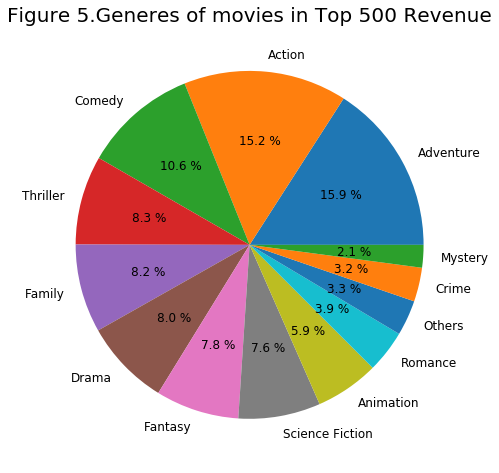

In [19]:
s=pd.Series(list(y),index=list(x))
s['Others']=sum(s[s.values<=20])
s=s[s.values>20].sort_values(ascending=False)

x=s.index
y=s.values
yy=y/sum(y)

plt.figure(figsize=(8,8))
plt.title('Figure 5.Generes of movies in Top 500 Revenue',fontsize=20)
plt.pie(yy,labels=x,autopct='%.1f %%',textprops = {'fontsize':12, 'color':'k'})
plt.show()

Figure 5 suggested that adventure,action and comedy movied are the most preference of market, which may result from strong visual effect and easy humor style. 

#### Rating

The 'vote_average' was identified as rating or movie scoring, which reflects the quality of this movie to some extent.

To accurately represent the population of movies I am interested, samples with 'vote_count' larger than 1000 were extracted and analysized.

Firstly, the top 10 movies in rating and genres distribution are explored.

In [20]:
df_rating=df.set_index('vote_average',drop=False)
df_rating=df_rating[df_rating['vote_count']>=1000]

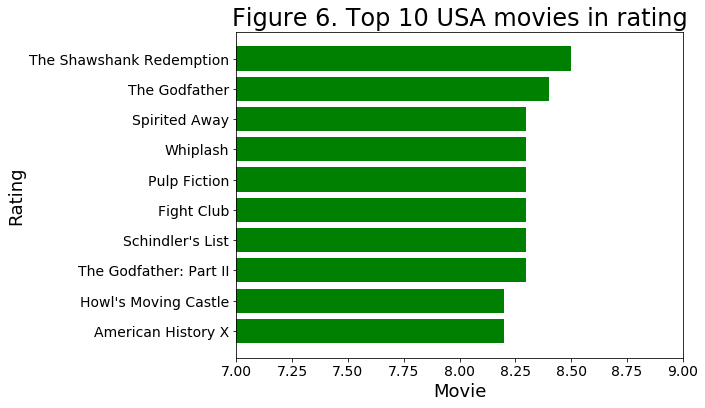

In [21]:
df_rating=df_rating.sort_index().iloc[-10:]
plt.figure(figsize=(8,6))
plt.title('Figure 6. Top 10 USA movies in rating',fontsize=24)
plt.xlabel('Movie',fontsize=18)
plt.ylabel('Rating',fontsize=18)
plt.xlim(7, 9)
plt.tick_params(labelsize=14)
plt.barh(df_rating.title,df_rating.vote_average,color='green')
plt.show()

Then, the distribution of generes were plotted in Figure 7.Same as before, The number of generes less than 20 were aggregated and identified as 'Others'.

[]

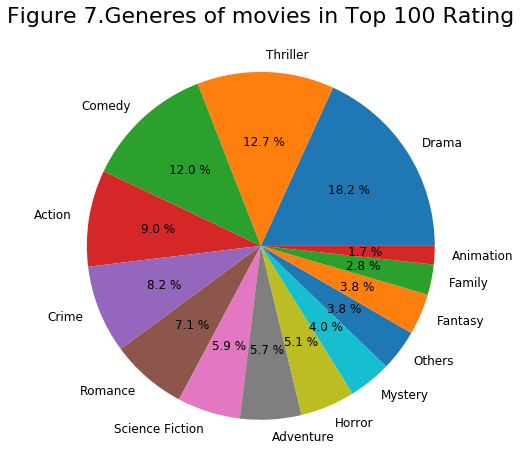

In [22]:
df_rating=df.set_index('vote_average',drop=False)
df_rating=df_rating[df_rating['vote_count']>=1000].iloc[-500:]


keyword_occurences, dum = count_word(df_rating, 'genres', set_genres)
x, y = zip(*keyword_occurences) # unpack a list of pairs into two tuples

s=pd.Series(list(y),index=list(x))
s['Others']=sum(s[s.values<=20])
s=s[s.values>20].sort_values(ascending=False)

x=s.index
y=s.values
yy=y/sum(y)

plt.figure(figsize=(8,8))
plt.title('Figure 7.Generes of movies in Top 100 Rating',fontsize=22)
plt.pie(yy,labels=x,autopct='%.1f %%',textprops = {'fontsize':12, 'color':'k'})
plt.plot()

The film genres and cinematic styles in rating rank are abundant(**Fig.6** and **Fig.7**).Great flims like The godfather series(Crime film)or The Shawshank Redemption and Whiplash (drama film) with enduring popularity indicated that apart from a good movie has gorgeous visuals, the more it should have a profound ideological

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295